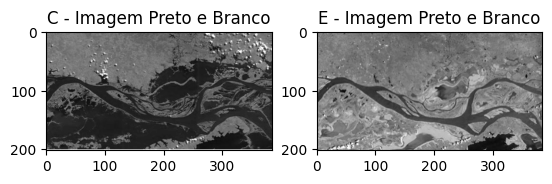

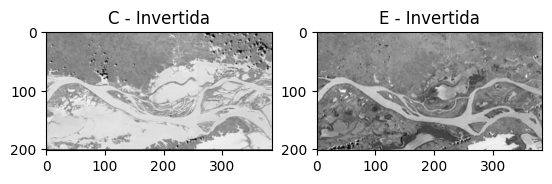

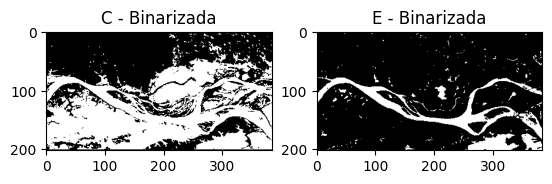

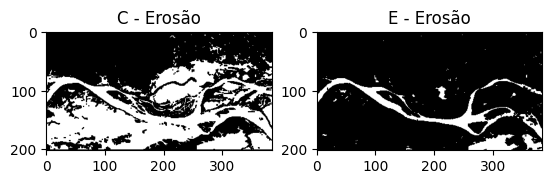

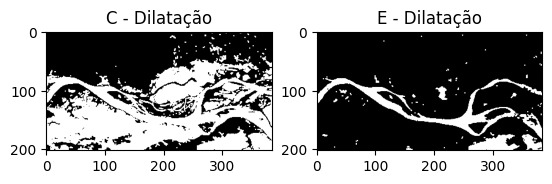

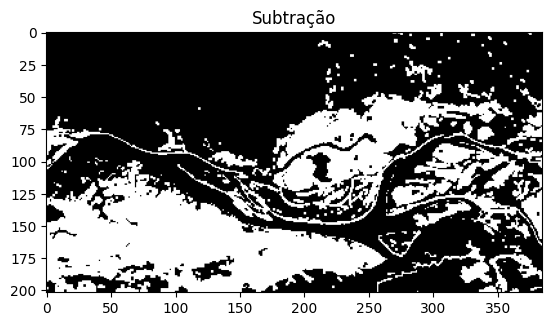

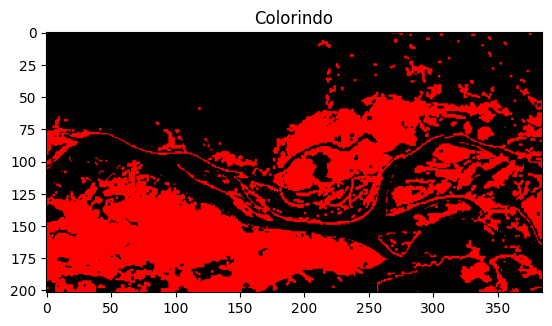

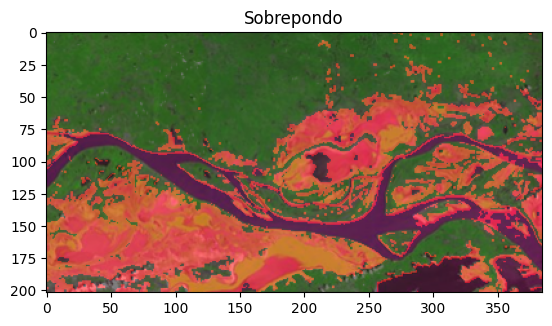

"\nkernel = np.ones((5,5),np.uint8)\ndilate = cv2.dilate(bin,kernel,iterations = 1)\n# plt.subplot(1,3,2)\nplt.imshow(dilate,'gray')\nplt.title('Dilatação')\nplt.show()\n\nerode = cv2.erode(dilate,kernel,iterations = 1)\n# plt.subplot(1,3,3)\nplt.imshow(erode,'gray')\nplt.title('Erosão')\n\nplt.show()\n\n"

In [100]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

img_chuvoso = cv2.imread('Trabalho 01 (rios)/chuvoso.png')
img_estiagem = cv2.imread('Trabalho 01 (rios)/estiagem.png')

altura1, largura1 = img_chuvoso.shape[:2]

img_estiagem = cv2.resize(img_estiagem, (largura1, altura1))



# Chuvoso
img_chuvoso = cv2.cvtColor(img_chuvoso, cv2.COLOR_RGB2GRAY)
plt.subplot(1,2,1)
plt.imshow(img_chuvoso, 'gray')
plt.title('C - Imagem Preto e Branco')
img_estiagem_original =img_estiagem

#Estiagem
img_estiagem = cv2.cvtColor(img_estiagem, cv2.COLOR_RGB2GRAY)
plt.subplot(1,2,2)
plt.imshow(img_estiagem, 'gray')
plt.title('E - Imagem Preto e Branco')

plt.show()

##Inversão de cor

#Chuvoso
img_chuvoso = cv2.bitwise_not(img_chuvoso)
plt.subplot(1,2,1)
plt.imshow(img_chuvoso, 'gray')
plt.title('C - Invertida')

#Estiagem
img_estiagem = cv2.bitwise_not(img_estiagem)
plt.subplot(1,2,2)
plt.imshow(img_estiagem, 'gray')
plt.title('E - Invertida')

plt.show()

##Binarização

#Chuvoso
(T, bin) = cv2.threshold(img_chuvoso, 170, 255, cv2.THRESH_BINARY)
img_chuvoso = bin
plt.subplot(1,2,1)
plt.imshow(img_chuvoso, 'gray')
plt.title('C - Binarizada')


#Estiagem
(T, bin) = cv2.threshold(img_estiagem, 130, 255, cv2.THRESH_BINARY)
img_estiagem = bin
plt.subplot(1,2,2)
plt.imshow(img_estiagem, 'gray')
plt.title('E - Binarizada')

plt.show()

##Erosão

#Chuvoso
kernel = np.ones((2,2),np.uint8)
img_chuvoso = cv2.erode(img_chuvoso,kernel,iterations = 1)
plt.subplot(1,2,1)
plt.imshow(img_chuvoso,'gray')
plt.title('C - Erosão')

#Estiagem
img_estiagem = cv2.erode(img_estiagem,kernel,iterations = 1)
plt.subplot(1,2,2)
plt.imshow(img_estiagem,'gray')
plt.title('E - Erosão')

plt.show()

##Dilatação

#Chuvoso
img_chuvoso = cv2.dilate(img_chuvoso,kernel,iterations = 1)
plt.subplot(1,2,1)
plt.imshow(img_chuvoso,'gray')
plt.title('C - Dilatação')

#Estiagem
img_estiagem = cv2.dilate(img_estiagem,kernel,iterations = 1)
plt.subplot(1,2,2)
plt.imshow(img_estiagem,'gray')
plt.title('E - Dilatação')


plt.show()

## Subtraindo imagens
subtractedImage = cv2.subtract(img_chuvoso,img_estiagem)
plt.imshow(subtractedImage,'gray')
plt.title('Subtração')
plt.show()

## Colorindo

altura, largura = subtractedImage.shape

imagem_colorida = np.zeros((altura, largura, 3), dtype=np.uint8)

for i in range(altura):
    for j in range(largura):
        if subtractedImage[i, j]== 255:
             imagem_colorida[i,j] = [255, 0, 0]


plt.imshow(imagem_colorida)
plt.title('Colorindo')
plt.show()

## Sobrepondo
imagem_sobreposta = cv2.addWeighted(img_estiagem_original, 0.5, imagem_colorida, 0.5, 0)

plt.imshow(imagem_sobreposta)
plt.title('Sobrepondo')
plt.show()

'''
kernel = np.ones((5,5),np.uint8)
dilate = cv2.dilate(bin,kernel,iterations = 1)
# plt.subplot(1,3,2)
plt.imshow(dilate,'gray')
plt.title('Dilatação')
plt.show()

erode = cv2.erode(dilate,kernel,iterations = 1)
# plt.subplot(1,3,3)
plt.imshow(erode,'gray')
plt.title('Erosão')

plt.show()

'''